# Statistical Distribution Theory Demonstration In Python

## **Objectives**

1. To calculate probabilities using **Binomial**, **Poisson**, and **Normal** distributions.
2. To assess **normality** of data using **Q-Q plots** for variables `csi` and `billamt`.



## Import Libraries

In [20]:
from scipy.stats import binom, poisson, norm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## Probability Calculations

### A. Binomial Distribution (Risk Management Example)


In [21]:
# A bank has 20 borrowers. Probability of default = 0.1.
# Find probability that exactly 3 borrowers default.

n = 20     # number of borrowers
p = 0.1    # probability of default
k = 3      # number of defaults
binom_prob = binom.pmf(k, n, p)
print(f"Probability that exactly 3 borrowers default is {binom_prob:.4f}")

Probability that exactly 3 borrowers default is 0.1901


### B. Poisson Distribution (Insurance Example) 


In [16]:
# An insurance company receives 5 claims per week on average.
# Find the probability of exactly 8 claims in a week.

lambda_ = 5   # average number of claims per week
k = 8         # number of claims
poisson_prob = poisson.pmf(k, lambda_)
print(f"Probability that exactly 8 claims in a week is {poisson_prob:.4f}")

Probability that exactly 8 claims in a week is 0.0653


### C. Normal Distribution (Finance Example)


In [17]:
# Stock returns are normally distributed with mean = 8%, SD = 4%.
# Find the probability that return exceeds 12%.

mean = 0.08
sd = 0.04
x = 0.12
prob = 1 - norm.cdf(x, mean, sd)
print(f"Probability that return exceeds 12% is {prob:.4f}")

Probability that return exceeds 12% is 0.1587


### For assessing Normality, We will use the dataset 'Normality Testing'

### Data Description

| Column Name | Description | Data Type |
|--------------|-------------|------------|
| **id** | Unique identifier for each record or customer | Integer |
| **csi** | Customer Satisfaction Index score (a measure of satisfaction level) | Float |
| **billamt** | Billing amount or total purchase amount by the customer | Float |


### Visualizing Using Q-Q Plot and Box-Whisker Plot

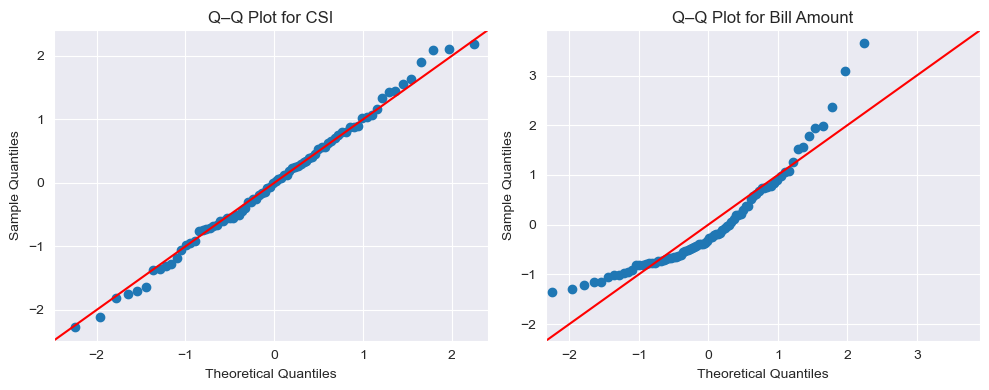

In [18]:
data = pd.read_csv('Normality Testing Data.csv')

import statsmodels.api as sm

# --- Q–Q Plot using statsmodels ---
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sm.graphics.qqplot(data.csi, line='45', fit=True,ax = axes[0])
axes[0].set_title('Q–Q Plot for CSI')

sm.graphics.qqplot(data.billamt, line='45', fit=True,ax = axes[1])
axes[1].set_title('Q–Q Plot for Bill Amount')

plt.tight_layout()
plt.show()

### Inference : 
- CSI values lie close to the diagonal line, indicating they are approximately normally distributed.

- Bill Amount values deviate from the line at the tails, suggesting a non-normal distribution.

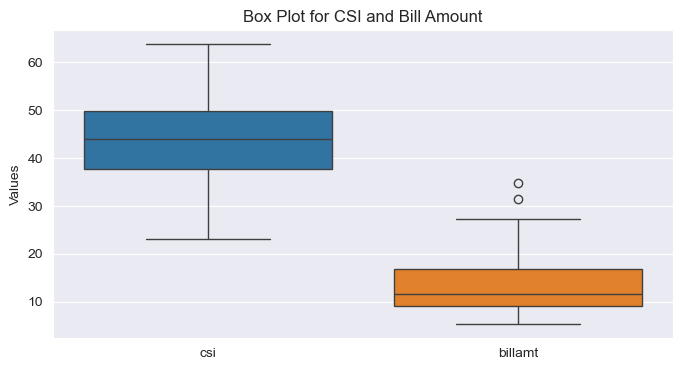

In [19]:
plt.figure(figsize=(8,4))
sns.boxplot(data=data[['csi', 'billamt']])
plt.title('Box Plot for CSI and Bill Amount')
plt.ylabel('Values')
plt.show()

### Inference :

- CSI values are symmetrically distributed with no outliers.

- Bill Amount shows asymmetry and there are 2 data outliers.